In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math

from collections import OrderedDict

torch.set_printoptions(linewidth = 150)

In [2]:
train_set = torchvision.datasets.FashionMNIST(root = './data',
                                             train = True,
                                             download = False,
                                             transform = transforms.Compose([
                                                 transforms.ToTensor()
                                             ]))

In [3]:
image, label = train_set[1]

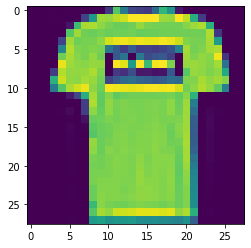

In [4]:
plt.imshow(image.squeeze())

In [5]:
print(image.shape)
print(image.squeeze().shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


In [6]:
in_features = image.numel()  # number of elements/pixels in an image
in_features

784

In [7]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
out_features = math.floor(in_features/2)
out_features

392

In [9]:
out_classes = len(train_set.classes)
out_classes

10

In [14]:
network1 = nn.Sequential(
            nn.Flatten(start_dim=1),
            nn.Linear(in_features=in_features, out_features=out_features),
            nn.Linear(out_features, out_classes))
network1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [15]:
image.shape

torch.Size([1, 28, 28])

In [21]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [22]:
network1(image)

tensor([[ 0.0182,  0.1380, -0.2312, -0.4162,  0.2383,  0.0977, -0.4109,  0.0930, -0.0093,  0.0354]], grad_fn=<AddmmBackward>)

In [23]:
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1)),
    ('hidden', nn.Linear(in_features, out_features)),
    ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [24]:
network2(image)

tensor([[-0.1768, -0.0456,  0.1790, -0.2304, -0.2859,  0.0413, -0.1176, -0.0358, -0.1374, -0.0315]], grad_fn=<AddmmBackward>)

In [25]:
torch.manual_seed(50)

network1 = nn.Sequential(
            nn.Flatten(start_dim=1),
            nn.Linear(in_features=in_features, out_features=out_features),
            nn.Linear(out_features, out_classes))

torch.manual_seed(50)

layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1)),
    ('hidden', nn.Linear(in_features, out_features)),
    ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)

In [26]:
network1(image), network2(image)

(tensor([[ 0.4361, -0.0527, -0.0495, -0.2438,  0.4147,  0.0940,  0.0679,  0.0852, -0.2362, -0.1341]], grad_fn=<AddmmBackward>),
 tensor([[ 0.4361, -0.0527, -0.0495, -0.2438,  0.4147,  0.0940,  0.0679,  0.0852, -0.2362, -0.1341]], grad_fn=<AddmmBackward>))

In [27]:
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat', nn.Flatten(start_dim=1))
network3.add_module('hidden', nn.Linear(in_features, out_features))
network3.add_module('output', nn.Linear(out_features, out_classes))

network3

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [27]:
torch.manual_seed(1)
from torch.autograd import Variable

In [28]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x, requires_grad = False), Variable(y, requires_grad = False )

In [39]:
def save():
    net1 = torch.nn.Sequential(
            torch.nn.Linear(1, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 1))
    
    optimizer = torch.optim.SGD(net1.parameters(), lr = 0.5)
    loss_func = torch.nn.MSELoss()
    
    
    for i in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    plt.figure(1, figsize = (10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    
    torch.save(net1, 'net.pk1')  # save entire net
    torch.save(net1.state_dict, 'net_params.pk1')

In [40]:
def restore_net():
    net2 = torch.load('net.pk1')
    prediction = net2(x)
    
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    

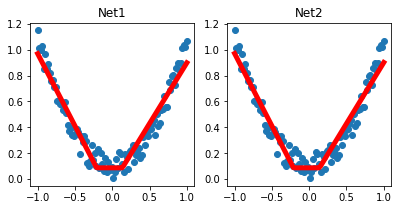

In [42]:
save()
restore_net()

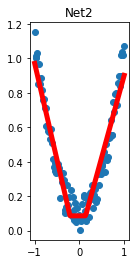

In [43]:
restore_net()